# **Weight Initialization Techniques in Keras**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  
---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import datasets
from sklearn.pipeline import Pipeline

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [5]:
x,y = datasets.make_moons(n_samples=100, noise=0.4, random_state=42)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='he_normal'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.4479 - loss: 0.8183 - val_accuracy: 0.4375 - val_loss: 0.7512
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4688 - loss: 0.7459 - val_accuracy: 0.4375 - val_loss: 0.7335
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4792 - loss: 0.7204 - val_accuracy: 0.4375 - val_loss: 0.7164
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4583 - loss: 0.7168 - val_accuracy: 0.4375 - val_loss: 0.7004
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5417 - loss: 0.6602 - val_accuracy: 0.3750 - val_loss: 0.6867
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4896 - loss: 0.6817 - val_accuracy: 0.4375 - val_loss: 0.6746
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5208 - loss: 0.6511 - val_accuracy: 0.4375 - val_loss: 0.6637
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4896 - loss: 0.6641 - val_accuracy: 0.4375 - val_loss

In [10]:
model.get_weights()

[array([[ 1.11497   , -1.1828561 ,  0.2695598 , -0.16175841,  1.2227414 ,
         -2.0396326 ,  1.2042656 ,  0.39086252,  1.0018187 , -0.88625526],
        [-0.5642086 ,  1.5117964 , -0.86154175,  0.16194503, -0.10585027,
         -0.50316185, -1.12484   , -0.33064145,  2.2493973 ,  0.18223669]],
       dtype=float32),
 array([-0.0882711 ,  0.11603034,  0.1188979 , -0.09052809, -0.01810862,
        -0.09468007,  0.08394343, -0.1171848 ,  0.06258024, -0.01327021],
       dtype=float32),
 array([[ 0.48306736,  0.5178125 ,  0.2972903 ,  0.46349275, -0.5016939 ,
         -0.56130797, -0.60596406,  0.06070362,  0.13527022,  0.5505465 ],
        [ 0.60862213,  0.15297125,  0.37001538,  0.7579863 , -0.28801212,
          0.45707265, -0.3955162 ,  0.2593795 ,  0.38374767,  0.2432311 ],
        [ 0.08913625,  0.7973934 , -0.24780391, -0.09150469,  0.23751931,
         -0.39881343, -0.16947073,  0.36668113,  0.38902408,  0.5009269 ],
        [ 0.90306973, -0.772552  ,  0.533757  , -0.8930913 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

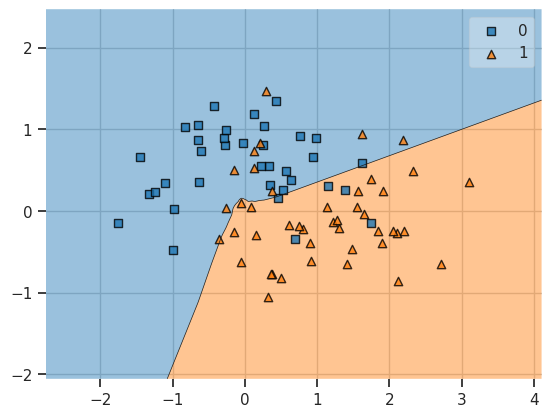

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=model)

In [13]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,validation_split=0.2,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.3229 - loss: 0.7667 - val_accuracy: 0.3125 - val_loss: 0.7581
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2708 - loss: 0.7670 - val_accuracy: 0.3125 - val_loss: 0.7512
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2917 - loss: 0.7553 - val_accuracy: 0.2500 - val_loss: 0.7445
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3542 - loss: 0.7413 - val_accuracy: 0.3125 - val_loss: 0.7385
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3021 - loss: 0.7420 - val_accuracy: 0.3750 - val_loss: 0.7323
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3229 - loss: 0.7313 - val_accuracy: 0.3125 - val_loss: 0.7265
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3438 - loss: 0.7235 - val_accuracy: 0.3125 - val_loss: 0.7207
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3854 - loss: 0.7141 - val_accuracy: 0.3125 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

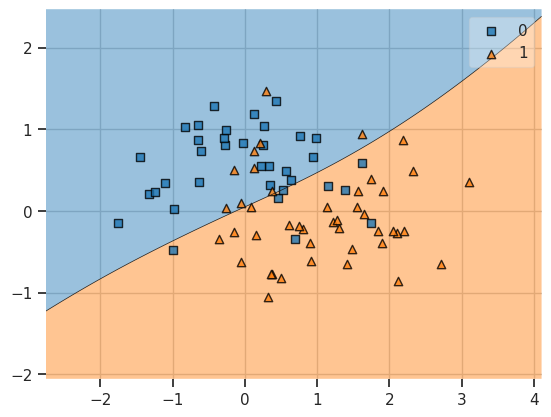

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train, clf=model)